# EDA

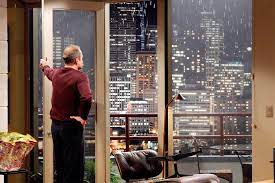

# Exploratory Data Analysis

This project is to review all skills and knowledge adquired during the first 3 weeks of the data science course. 

# Preparation

For the preparations lets first import the necessary libraries and load the files needed for our EDA

In [588]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv
import missingno as msno

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [589]:
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [590]:
load_dotenv()

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

# Create connection object conn
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

cur = conn.cursor()

sql_query_fetch_all_data = """
    SELECT *
    FROM eda.king_county_house_details kchd
    LEFT JOIN eda.king_county_house_sales kchs 
    ON kchd.id = kchs.house_id;
"""
cur.execute(sql_query_fetch_all_data)
cur.fetchall()

df_all = pd.read_sql(sql_query_fetch_all_data, conn)


#close the connection
conn.close()


df_all

df_all.to_csv('data/merged_data.csv',index=False)


In [591]:
df_all

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3.000,2.500,1530.000,1131.000,3.000,0.000,0.000,3,8,...,0.000,98103,47.699,-122.346,1530.000,1509.000,2014-05-21,360000.000,263000018,21593
21593,6600060120,4.000,2.500,2310.000,5813.000,2.000,0.000,0.000,3,8,...,0.000,98146,47.511,-122.362,1830.000,7200.000,2015-02-23,400000.000,6600060120,21594
21594,1523300141,2.000,0.750,1020.000,1350.000,2.000,0.000,0.000,3,7,...,0.000,98144,47.594,-122.299,1020.000,2007.000,2014-06-23,402101.000,1523300141,21595
21595,291310100,3.000,2.500,1600.000,2388.000,2.000,NaN,0.000,3,8,...,0.000,98027,47.535,-122.069,1410.000,1287.000,2015-01-16,400000.000,291310100,21596


In [592]:
df_all.shape
df_all.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id', 'id'],
      dtype='object')

In [593]:
## Task 1) at least 3 insights regarding the overall data one should be geographical. 
## Task 2) At least 3 recommendations for Nicole Johnson

#Client Nicole Johnson (Buyer), Lively, central neighborhood, middle price range, right timing (within a year)

# --> need to find houses that are close to the center
# --> Need to identify a middle price range
# --> Need to identify what are the months in the year where the prices drop

# It seems like I have a duplicate column for house_id, one from the details table and the other from the sales table. I want to delete the one from the sales table
df_all.drop('house_id', axis=1, inplace=True)

#There are two columns that are having the same name id. The first id column is the house_id and the second seems to be a sale id

new_columns = df_all.columns.tolist()
new_columns[0] = 'house_id'
new_columns[-1] = 'sales_id'
df_all.columns = new_columns

#Based on the client queries, I will define Research Questions and Hypothesis Generation

# 1. Affordable Center Houses:
# Question: What are some properties located near the downtown center of King County that are considered to be in the middle price range?
#           Hypothesis 1: Altough houses closer to the center a more expensive, there might be houses that are still affordable
# 2. Timing to Buy:
# Question: When is the most cost-effective time during the year for Nicole to purchase a house in the center of King County?
#           Hypothesis 1: There are drops in the price depending on the month that the house has been published
# 3. Liveness:
# Question: Where are the areas in King County Center that can be considered lively?
#           hypothesis 1: Areas closer to the water have lively activity


# check how many duplicated rows exist in the data frame
df_all.duplicated().value_counts()
# There is no duplicated lines

# check data types in data frame
df_all.dtypes
# change "date" dtype to datetime with format %Y/%m/%d
df_all['date'] = pd.to_datetime(df_all['date'], format='%Y/%m/%d')

#df_all.info()
#df_all.describe()


In [594]:
# display number of missing values per column
df_all.isna().sum()

house_id            0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
sales_id            0
dtype: int64

<Axes: >

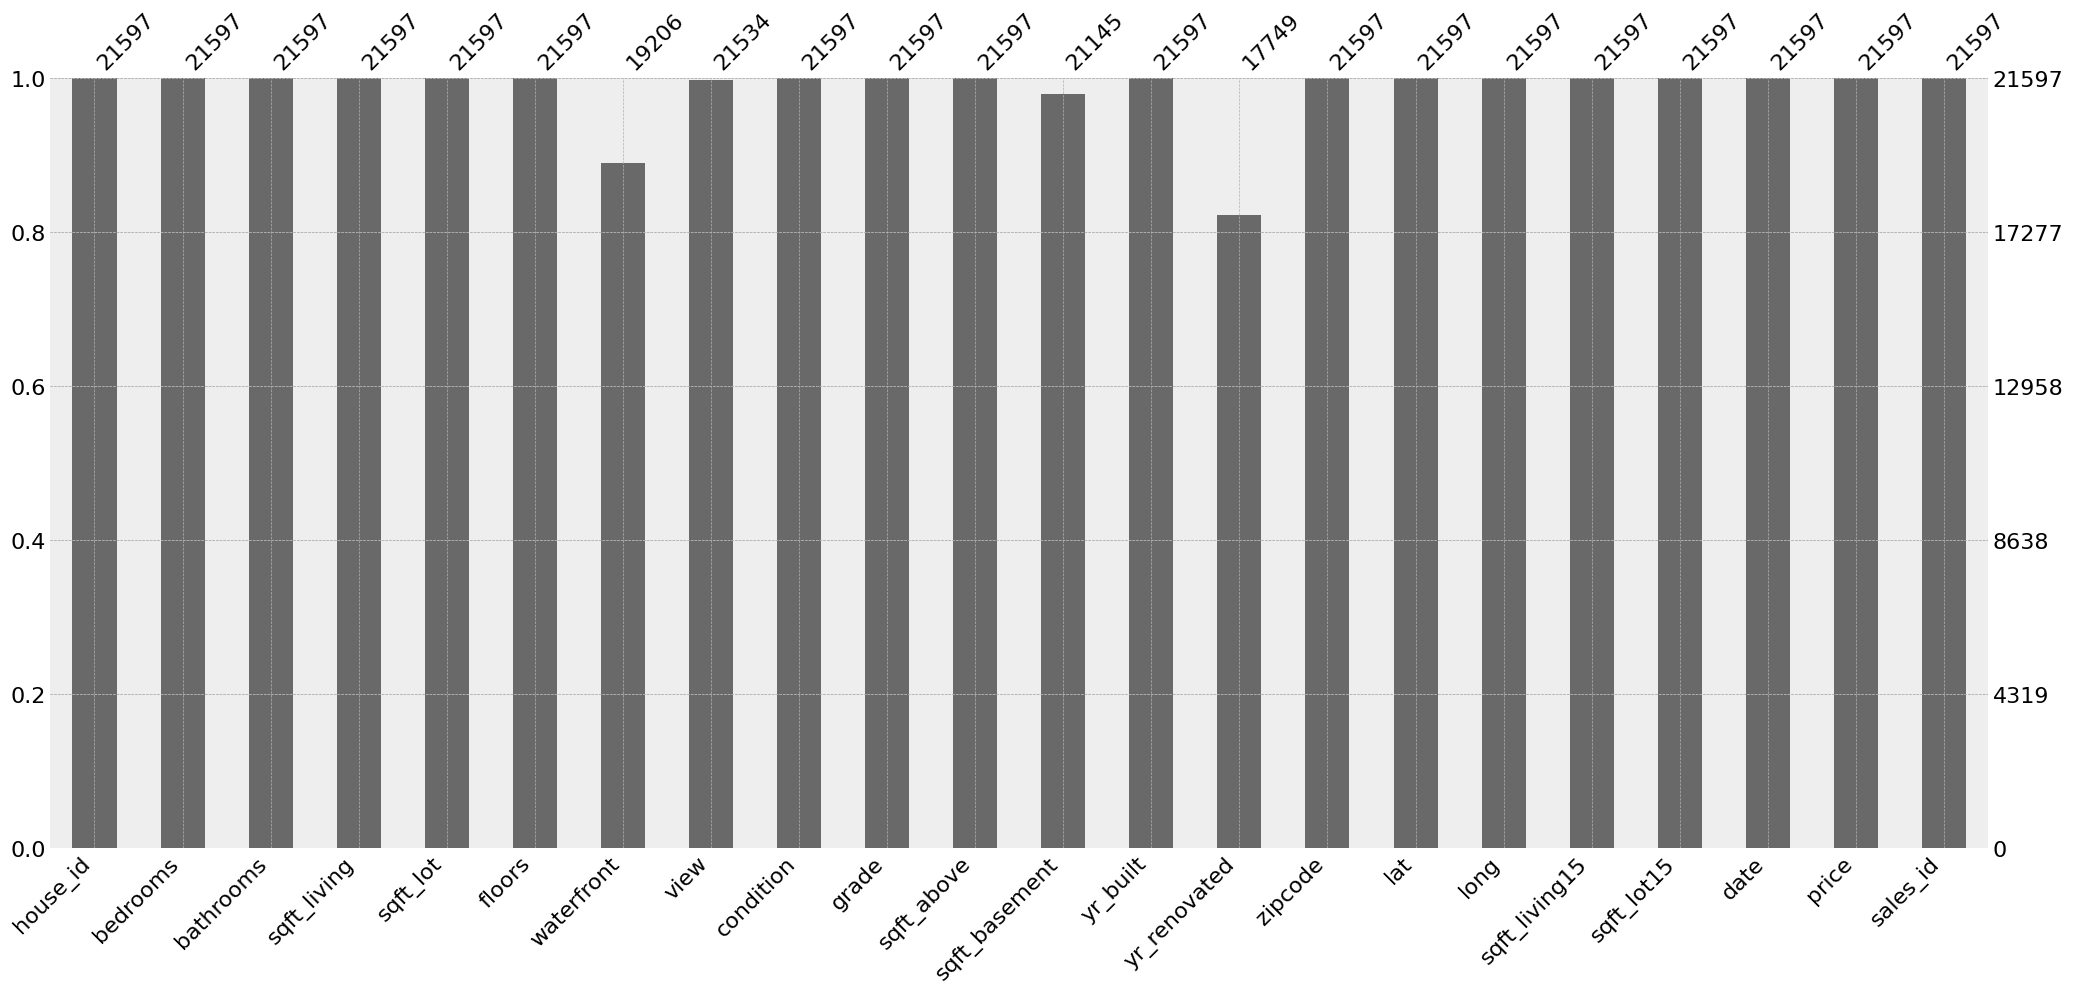

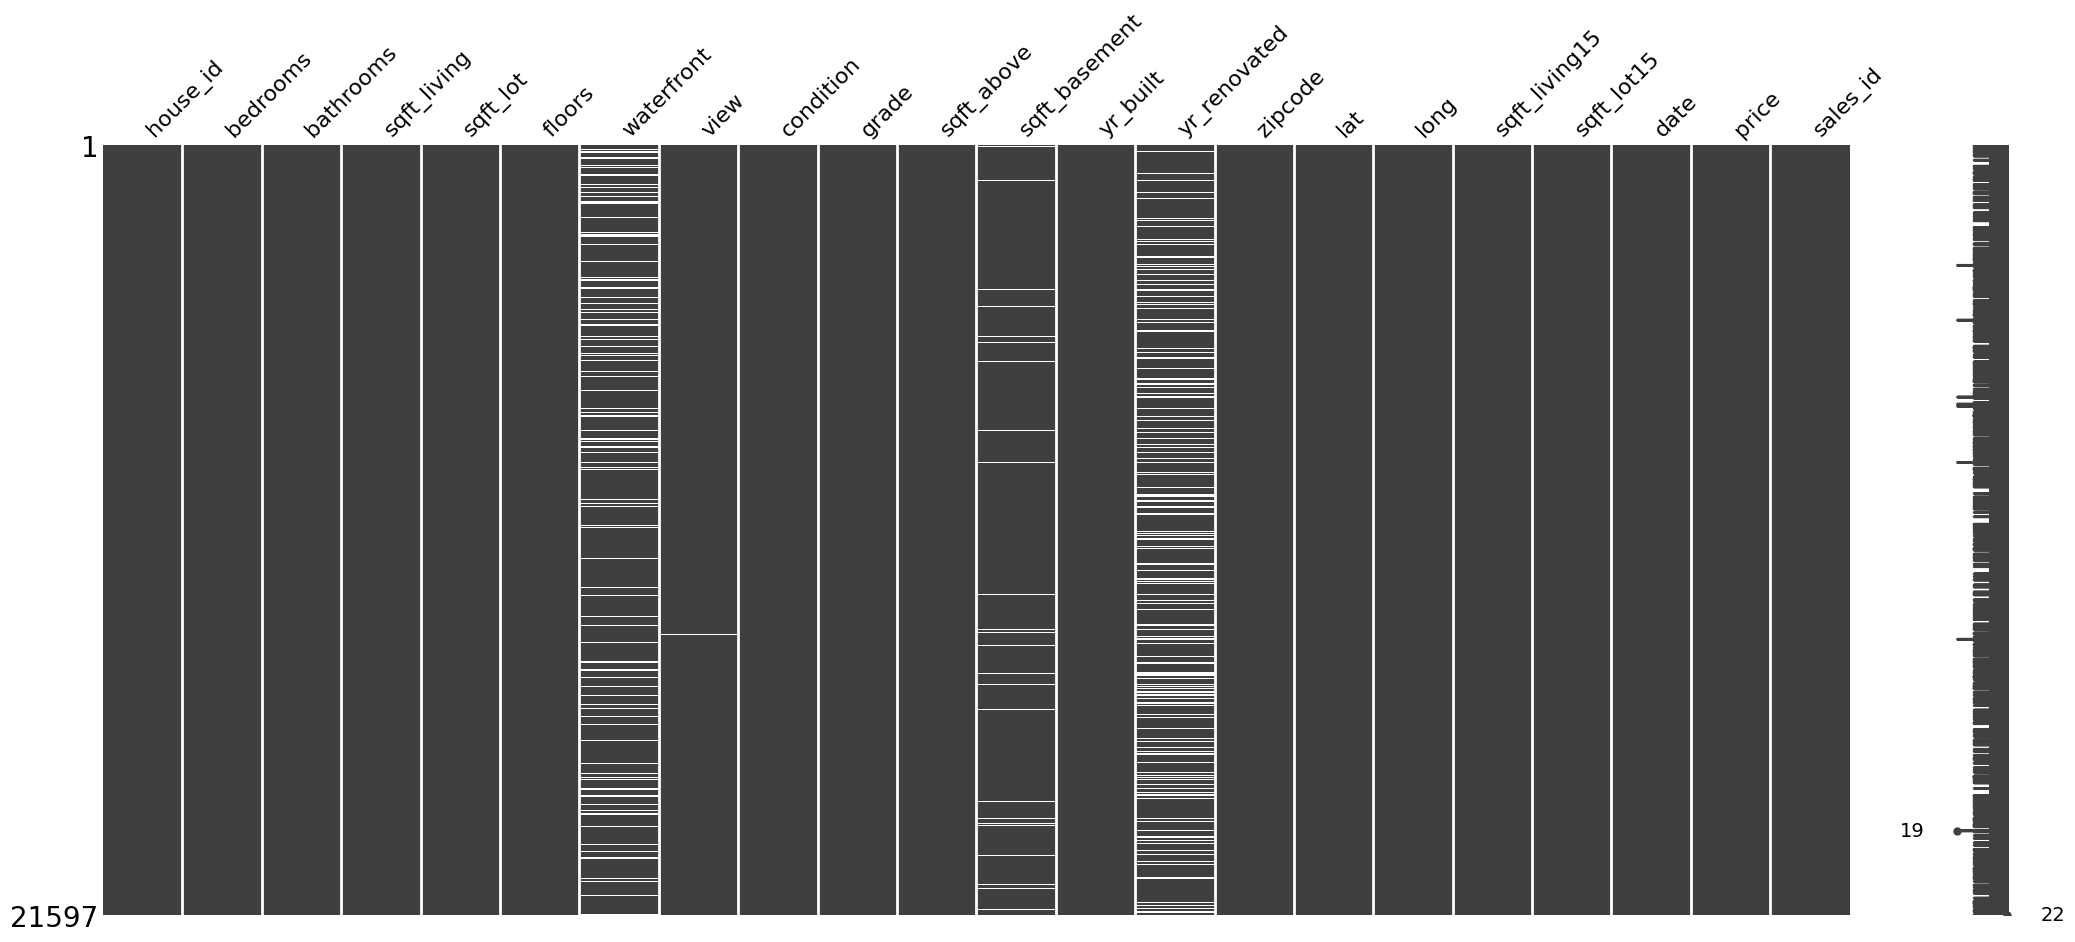

In [595]:

# plotting percentage of missing values per column
msno.bar(df_all)
msno.matrix(df_all)

In [596]:
df_all.columns

Index(['house_id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'sales_id'],
      dtype='object')

# Data Cleaning

In [597]:
#To clean the columns with empty values I will do some assumptions
# I am gonna assume that if the information of waterfront is not available then it means that there is 0 what means that the house has no view to a waterfront
# I will assume that if the view is na then it will be 0 
# I will also assume that if the sqft_basement is not given, the house does not has a basement and the value should be 0.
# Finally will also assume that if the yr_renovated is not given, the house has not been renovated yet an so it will also be 0.

df_all.fillna({'waterfront': 0, 'view': 0, 'sqft_basement': 0, 'yr_renovated': 0}, inplace=True)


#one more thing I noticed is that yr_renovated has a strange format, to get the year out of this I did the following:
#df_all['yr_renovated'] = (df_all['yr_renovated'] / 10) #--> just ran this once

#finally I would like to change data type to int for those columns where float is not necessary and will create a new data_set_formatted
df_clean= df_all.astype({'bedrooms': int, 'view': int, 'condition': int, 'grade': int, 'yr_built': int, 'yr_renovated': int, 
                         'zipcode': int, 'waterfront': int,'sqft_living': int,'sqft_lot': int,'sqft_above': int,'sqft_basement': int, 'sqft_living15': int, 'sqft_lot15': int})



df_clean.info()
df_clean
#df_all['floors'].unique()
#type(df_all['yr_renovated'][0])

#df_clean.to_csv('data/clean_data.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   house_id       21597 non-null  int64         
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  float64       
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  int64         
 14  zipcode        21597 non-null  int64         
 15  lat            2159

,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,sales_id
0,7129300520,3,1.000,1180,5650,1.000,0,0,3,7,...,1955,0,98178,47.511,-122.257,1340,5650,2014-10-13,221900.000,1
1,6414100192,3,2.250,2570,7242,2.000,0,0,3,7,...,1951,19910,98125,47.721,-122.319,1690,7639,2014-12-09,538000.000,2
2,5631500400,2,1.000,770,10000,1.000,0,0,3,6,...,1933,0,98028,47.738,-122.233,2720,8062,2015-02-25,180000.000,3
3,2487200875,4,3.000,1960,5000,1.000,0,0,5,7,...,1965,0,98136,47.521,-122.393,1360,5000,2014-12-09,604000.000,4
4,1954400510,3,2.000,1680,8080,1.000,0,0,3,8,...,1987,0,98074,47.617,-122.045,1800,7503,2015-02-18,510000.000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.500,1530,1131,3.000,0,0,3,8,...,2009,0,98103,47.699,-122.346,1530,1509,2014-05-21,360000.000,21593
21593,6600060120,4,2.500,2310,5813,2.000,0,0,3,8,...,2014,0,98146,47.511,-122.362,1830,7200,2015-02-23,400000.000,21594
21594,1523300141,2,0.750,1020,1350,2.000,0,0,3,7,...,2009,0,98144,47.594,-122.299,1020,2007,2014-06-23,402101.000,21595
21595,291310100,3,2.500,1600,2388,2.000,0,0,3,8,...,2004,0,98027,47.535,-122.069,1410,1287,2015-01-16,400000.000,21596


In [580]:
df = pd.read_csv("data/clean_data.csv")

# change "date" dtype to datetime with format %Y/%m/%d
df['date'] = pd.to_datetime(df_all['date'], format='%Y/%m/%d')

import plotly.express as px

fig = px.scatter_mapbox(
    df, 
    lat='lat', 
    lon='long', 
    zoom=10,
    title='Distribution of Houses in King County',
    mapbox_style="open-street-map"
)

fig.show()


# Center of seattle and sample selected

- A quick research shows that own of the most lively and centered districts in king county seattle are around the downtown center. 
- The approximately coordinates for the the downtown center in seattle is: 47.610798 and -122.335709, around this point we will have plenty of attractions, bars, restaurants
- Other central districts in these area are for example: Capitol Hill, Queen Anne, and South Lake Union are in a radius of round about 3Km
- My approach will be to define a central area of 3 km of radius from the coordinates suggested above
- All the houses inside this radius will be part of my sample

In [581]:

center_point_seattle = (47.610798, -122.335709)
center_lat = center_point_seattle[0]
center_long = center_point_seattle[1]
distance_km = 3

# To measure the distance between 2 points using a coordinate system we need to make use of a mathematical formula called "Harversine Formula"
# https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

# this is a function to calculate the distance between two points, we will call it harvesine_distance

def haversine_distance(lat1, long1, lat2, long2):
    R = 6371.0  # we define the Radius of the earth in km as a local constant 
    lat1, long1, lat2, long2 = map(np.radians, [lat1, long1, lat2, long2]) # we have here to convert coordinates from degrees to radians using numpy radians
    
    # Harvesine formula
    dlat = lat2 - lat1
    dlong = long2 - long1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c
    
    return distance

# we add a column calculating the distance to the center that we have defined
df['distance_to_center'] = haversine_distance(df['lat'], df['long'], center_lat, center_long)

In [582]:
df_center = df[df['distance_to_center']<=3]
df_center.shape
df_center.sort_values(by='distance_to_center').head(1)


,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,sales_id,distance_to_center
18923,2197600388,2,1.500,830,1077,2.000,0,0,3,7,...,0,98122,47.606,-122.319,830,1366,2014-12-02,350000.000,18924,1.370


Text(0.5, 1.0, 'Price vs. sqft_living for Houses within 3km of Center')

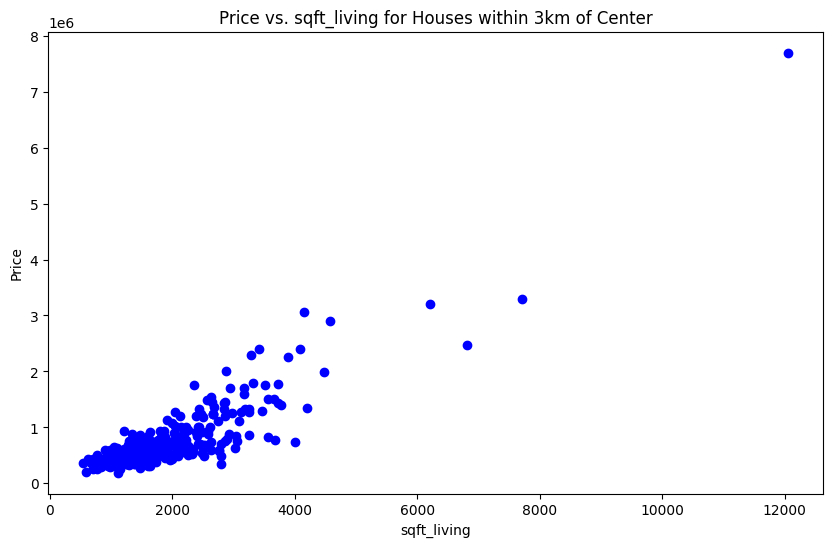

In [560]:
plt.figure(figsize=(10, 6))
plt.scatter(df_center['sqft_living'], df_center['price'], c="blue")
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('Price vs. sqft_living for Houses within 3km of Center')

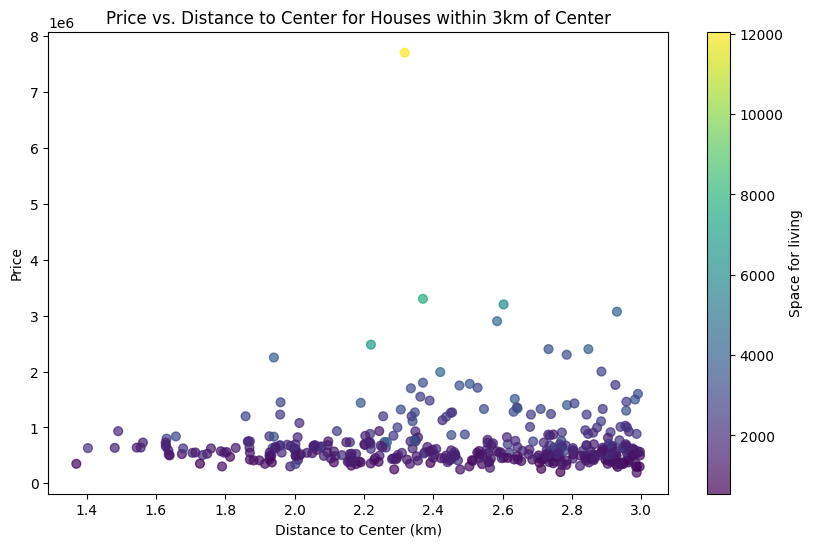

In [494]:
# The corr between the price and space seems to linear and positive. 

colors = df_center['sqft_living']
plt.figure(figsize=(10, 6))
plt.scatter(df_center['distance_to_center'], df_center['price'], c=colors, s=40, alpha=0.7)
plt.xlabel('Distance to Center (km)')
plt.ylabel('Price')
plt.title('Price vs. Distance to Center for Houses within 3km of Center')
plt.colorbar(label='Space for living') 

In [509]:
# Comparing the price and the distance does not give us much inside. It seems like there is no correlation between price and distance between 1.4Km and 3 Km

fig = px.scatter_mapbox(
    df_center, 
    lat='lat', 
    lon='long', 
    zoom=10,
    title='Distribution of Houses 3km away from the center',
    mapbox_style="open-street-map"
)

fig.update_layout(width=600, height=400)

fig.show()

# Numerical data distribution

For this part lets look at the distribution of all of the features by ploting them

To do so lets first list all the types of our data from our dataset and take only the numerical ones:


In [614]:
list(set(df_center.dtypes.tolist()))
df_num = df_center.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,sales_id,distance_to_center
27,3303700376,3,1.000,1400,1581,1.500,0,0,5,8,...,1909,0,98112,47.622,-122.314,1860,3861,667000.000,28,2.056
64,1189001180,3,2.250,1660,6000,1.000,0,0,3,7,...,1979,0,98122,47.611,-122.297,1440,4080,425000.000,65,2.902
175,7234600798,3,2.500,1120,1100,2.000,0,0,3,8,...,2008,0,98122,47.611,-122.310,1590,1795,425000.000,176,1.927
177,2254502445,3,1.000,1220,4800,1.000,0,0,3,6,...,1901,0,98122,47.610,-122.307,1200,4800,385000.000,178,2.154
237,7228500560,4,1.000,1970,4740,1.500,0,0,3,7,...,1904,2005,98122,47.614,-122.303,1510,4740,410000.000,238,2.472


Now lets plot them all:

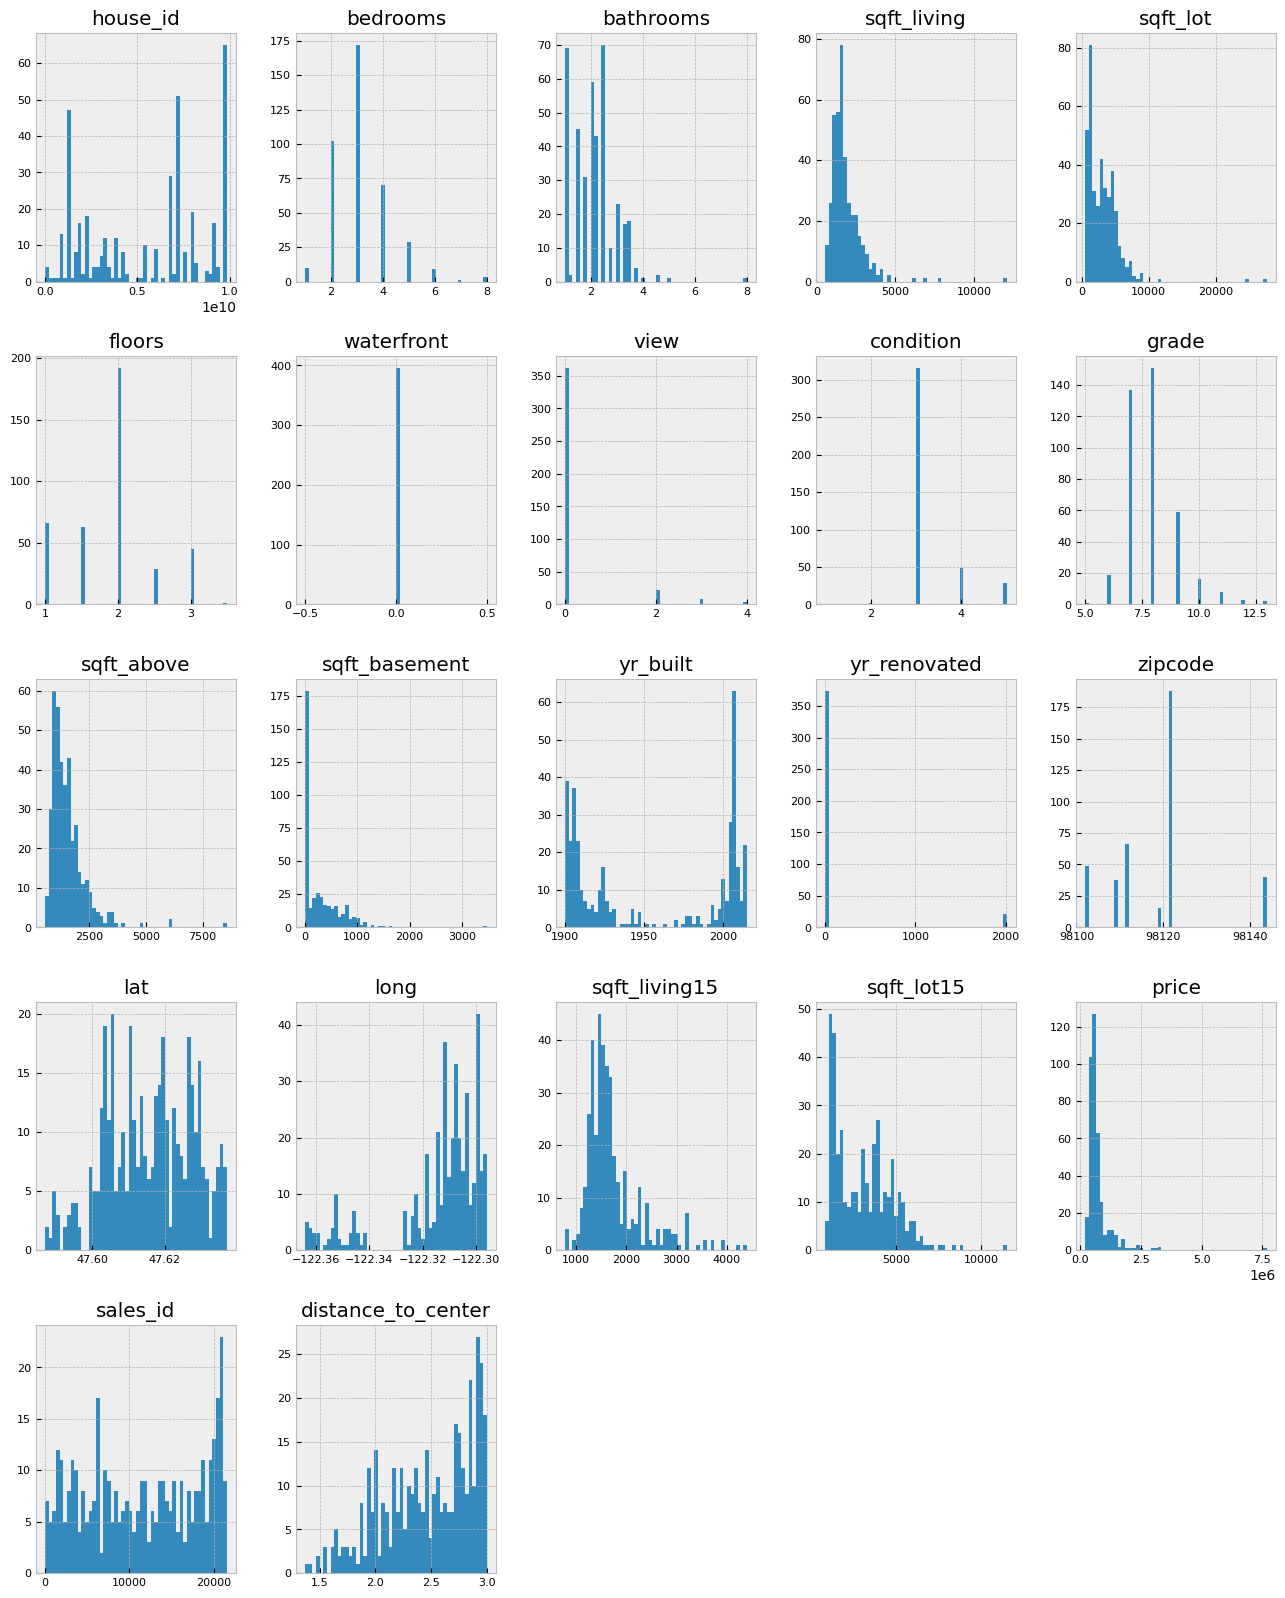

In [615]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Correlation

Now we'll try to find which features are strongly correlated with 'price'. We'll store them in a var called highly_corr_features_list. We'll reuse our df_num dataset to do so.



In [617]:

df_num_corr = df_num.corr()['price'][:-1] # -1 because the latest row is SalePrice
highly_corr_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Price:\n{}".format(len(highly_corr_features_list), highly_corr_features_list))

There is 9 strongly correlated values with Price:
price           1.000
sqft_living     0.876
sqft_above      0.828
sqft_living15   0.712
grade           0.681
sqft_lot        0.672
sqft_basement   0.569
bathrooms       0.524
sqft_lot15      0.511
Name: price, dtype: float64


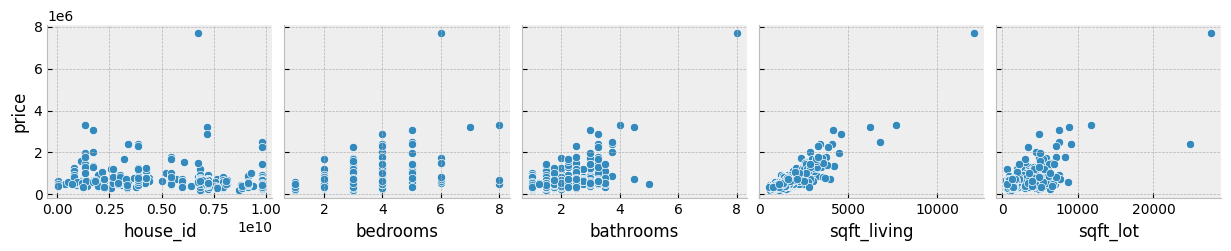

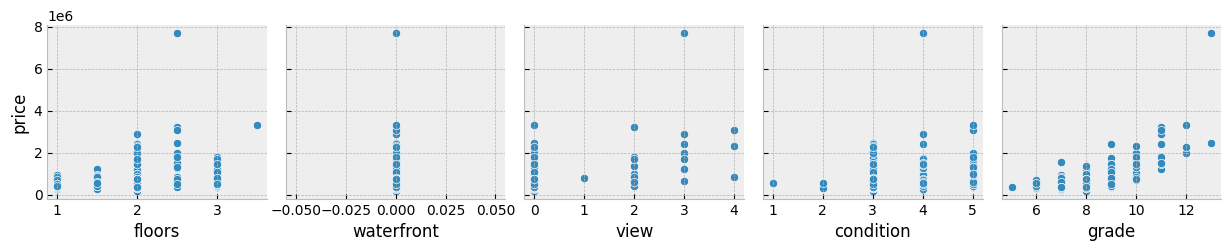

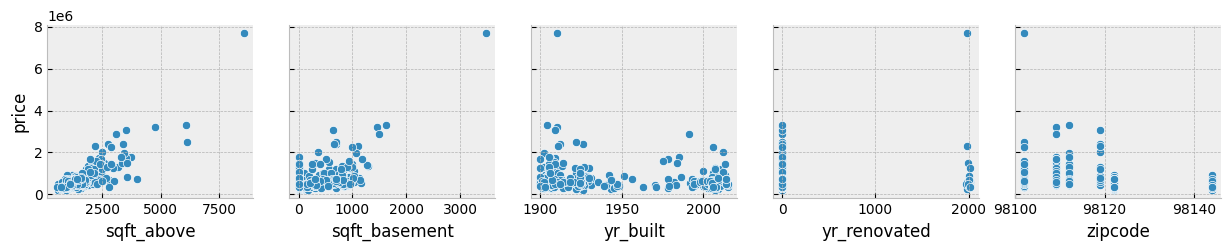

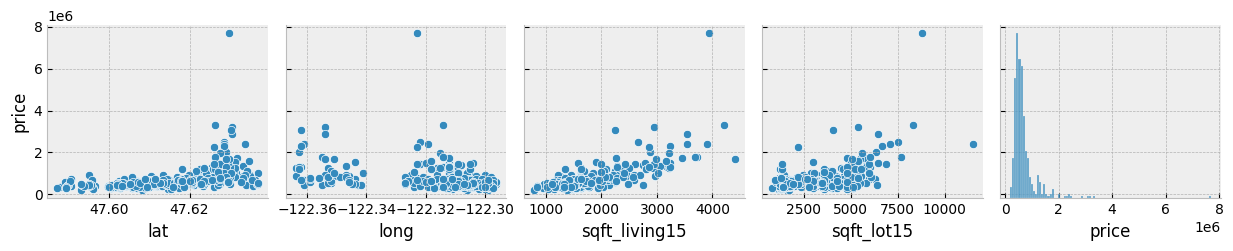

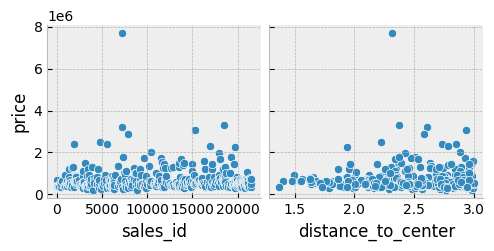

In [618]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['price'])

some relationships. Most of them seems to have a linear relationship with the Price and if we look closely at the data we can see that a lot of data points are located on x = 0 which may indicate the absence of such feature in the house.


# Feature to feature relationship or Heatmap

The following heatmaps can help us to see if some variables are linked between each other and then explain their relation with common sense.

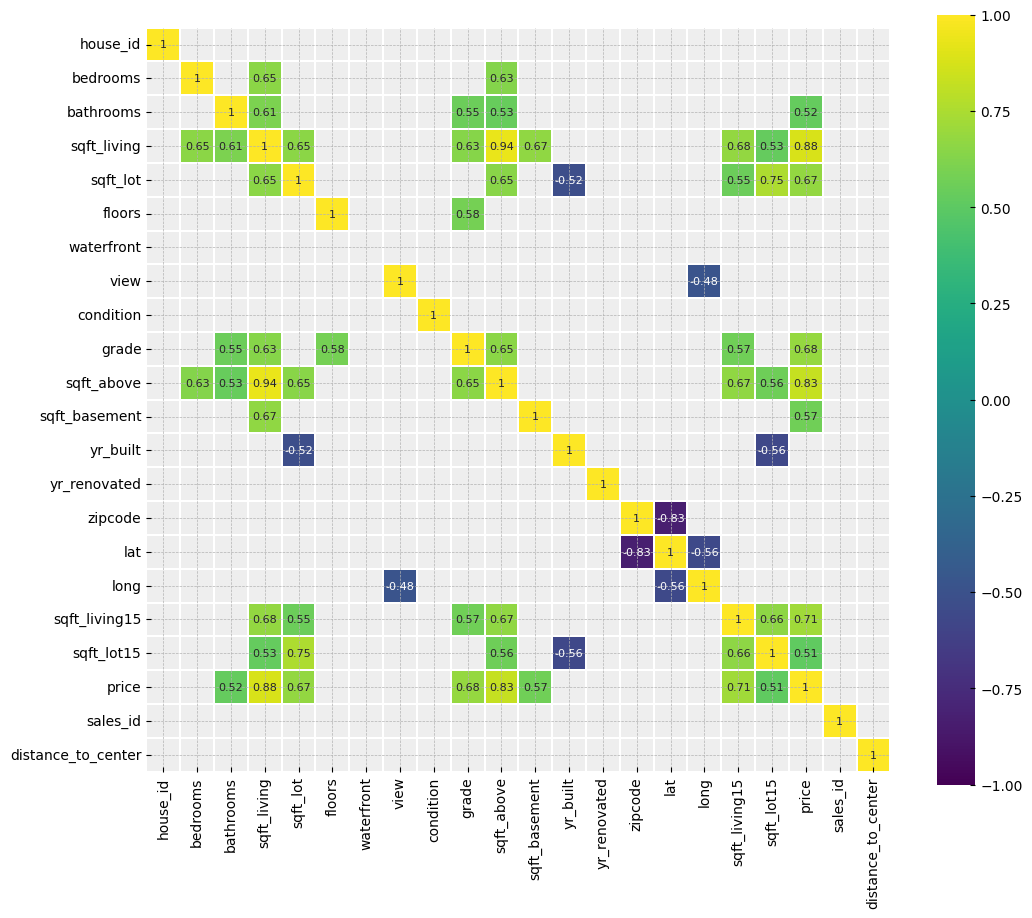

In [620]:
corr = df_num.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

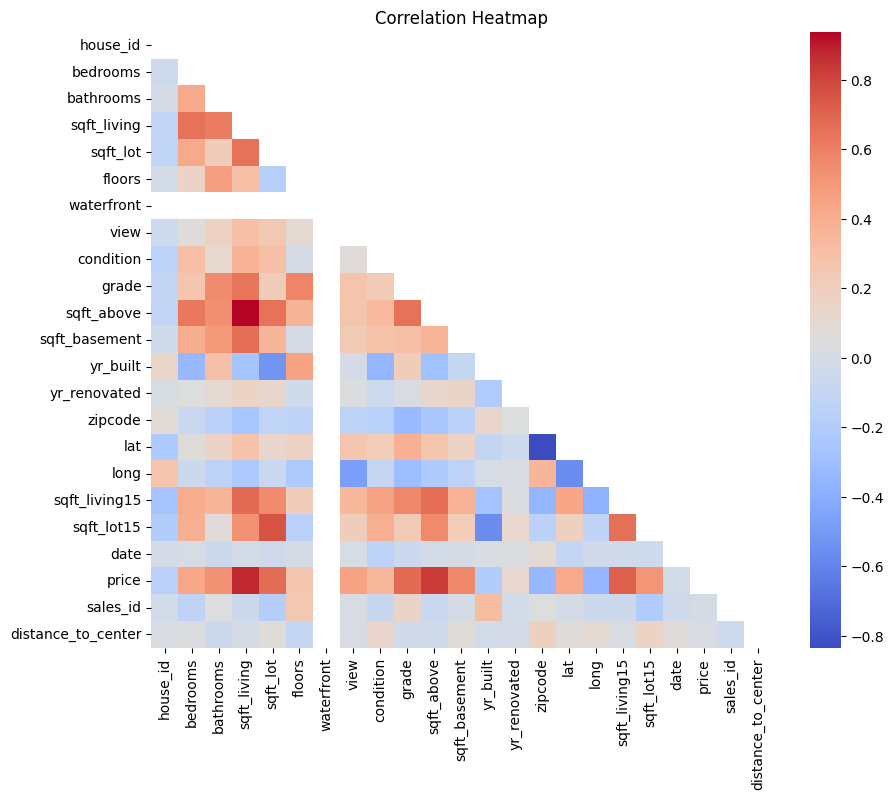

In [464]:
import matplotlib.pyplot as plt
# Create a correlation matrix
corr_matrix = df_center.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

based on the charts above I have the following observations on the real state market for the center area. 
```
1. Positive correlation of the price and the space for living: The price of a house goes up as the amount of living space increases.
2. Positive correlation of the price and the overall grade given to the housing unit:  There is a positive relationship between the price of a house and its overall grade given by King County.
3. The higher the square footage of interior housing living space for the nearest 15 neighbors the higher the price: Houses in neighborhoods with larger homes tend to be more expensive.

```

# Price Analysis

Now lets take a look at how the housing price is distributed

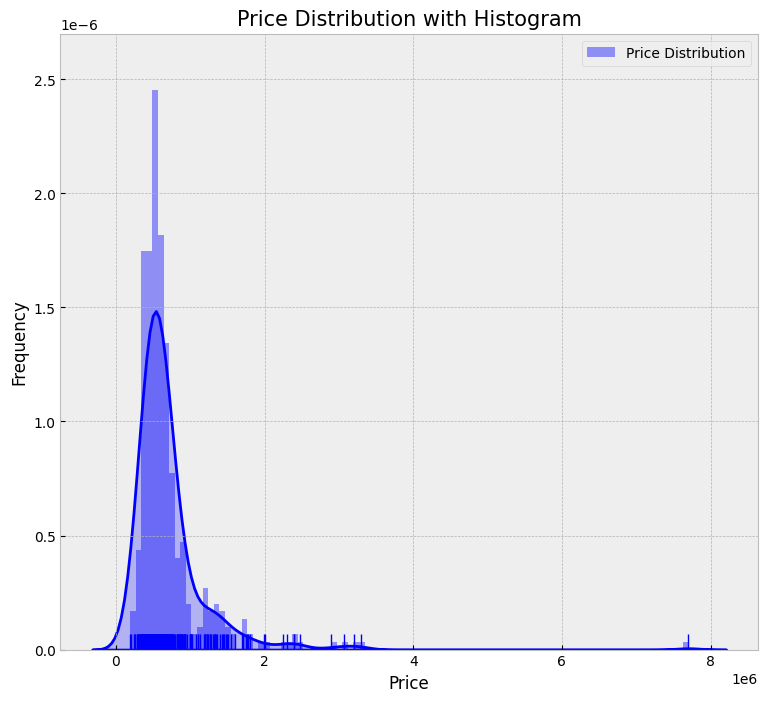

In [638]:
plt.figure(figsize=(9, 8))
sns.distplot(df_center['price'],
              color='b',
              bins=100,
              hist_kws={'alpha': 0.4},
              hist=True,
              kde=True,
              rug=True,
              kde_kws={'shade': True, 'linewidth': 2},
              label='Price Distribution'
              );

plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Price Distribution with Histogram', fontsize=15)
plt.legend()
plt.show()

In [556]:
# Let's take a stats analysis on the prices in this area

df_center['price'].describe()

count       396.000
mean     715285.896
std      563215.917
min      190500.000
25%      454625.000
50%      572000.000
75%      739093.750
max     7700000.000
Name: price, dtype: float64

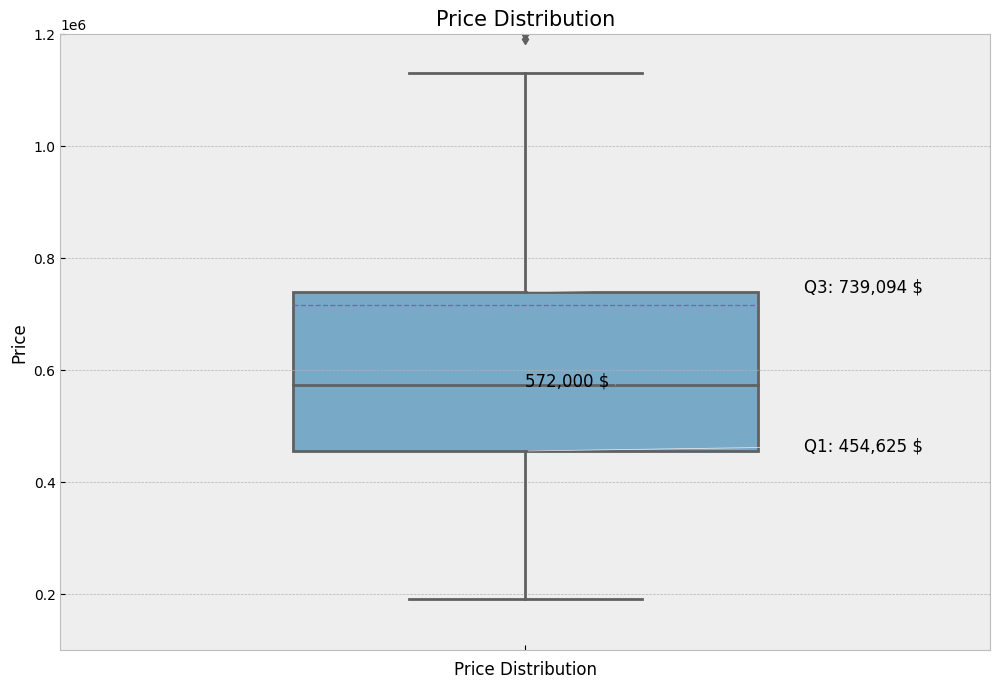

In [694]:
Q1 = int(df_center['price'].quantile(0.25).round(0))
median_price = int(df_center['price'].quantile(0.5).round(0))
Q3 = int(df_center['price'].quantile(0.75).round(0))

q1_str = '{:,.0f} $'.format(Q1)
median_price_str = '{:,.0f} $'.format(median_price)
q3_str = '{:,.0f} $'.format(Q3)

plt.figure(figsize=(12, 8))

sns.boxplot(y=df_center['price'],
            data=df_center,
            width=0.5,  
            palette="Blues",  
            showmeans=True,  
            meanline=True,  
            fliersize=5  
           )

plt.title('Price Distribution', fontsize=15)
plt.xlabel('Price Distribution', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.ylim([100000, 1200000])



# Adding some notes to make this plot much informative
plt.annotate(f'Q1: {q1_str}', xy=(0, Q1), xytext=(0.3, Q1),
             arrowprops=dict(facecolor='black', arrowstyle='-'),
             fontsize=12
            )

plt.annotate(f'{median_price_str}', xy=(0.1, median_price), xytext=(0, median_price),
             arrowprops=dict(facecolor='black', arrowstyle='-'),
             fontsize=12
            )

plt.annotate(f'Q3: {q3_str}', xy=(0, Q3), xytext=(0.3, Q3),
             arrowprops=dict(facecolor='black', arrowstyle='-'),
             fontsize=12
            )



plt.show()



# Middle Price Range

based on the table and the charts above
the middle price range is between $454625.000 and $739093.750. 
This means that the majority of homes in the dataset are selling for between these two prices and this is gonna be our middle price range

In [652]:


middle_price_range  = [df_center['price'].quantile(0.25), df_center['price'].quantile(0.75)]

#we filter again the data set for the middle_price_range

df_center_mp = df_center[(df_center['price'] >= middle_price_range[0]) & (df_center['price'] <= middle_price_range[1])]

df_center_mp['id_house_text'] = df_center['house_id'].astype(str)



# and plot it again

fig = px.scatter_mapbox(
    df_center_mp, 
    lat='lat', 
    lon='long', 
    color='price',
    color_continuous_scale=px.colors.cyclical.IceFire,
    zoom=10,
    size_max=30, 
    title='Distribution of middle price range centered Houses in King County',
    mapbox_style="open-street-map",
    text='id_house_text'
)

fig.update_layout(width=600, height=400)

fig.show()

df_center_mp.shape

(198, 24)

# Distance to center as an additional metric

pandas.core.series.Series

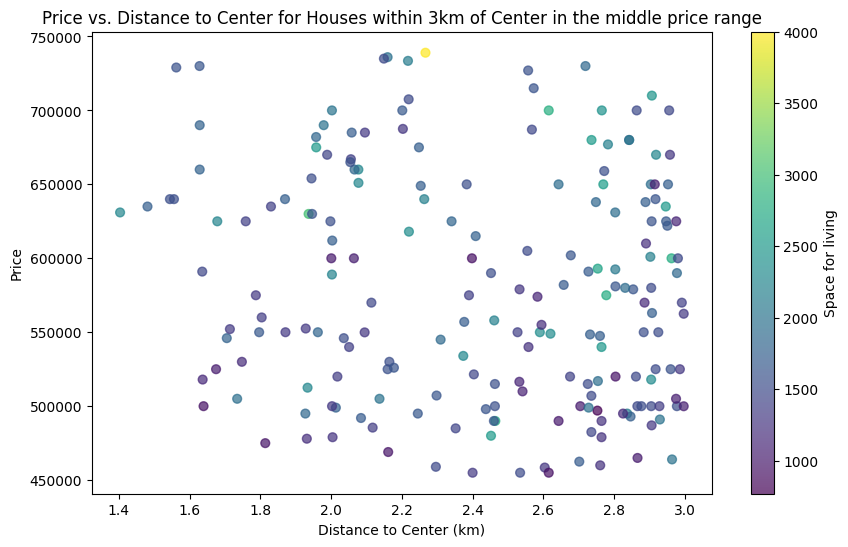

In [533]:

colors = df_center_mp['sqft_living']
plt.figure(figsize=(10, 6))
plt.scatter(df_center_mp['distance_to_center'], df_center_mp['price'], c=colors, s=40, alpha=0.7)
plt.xlabel('Distance to Center (km)')
plt.ylabel('Price')
plt.title('Price vs. Distance to Center for Houses within 3km of Center in the middle price range')
plt.colorbar(label='Space for living') 
type(colors)

pandas.core.series.Series

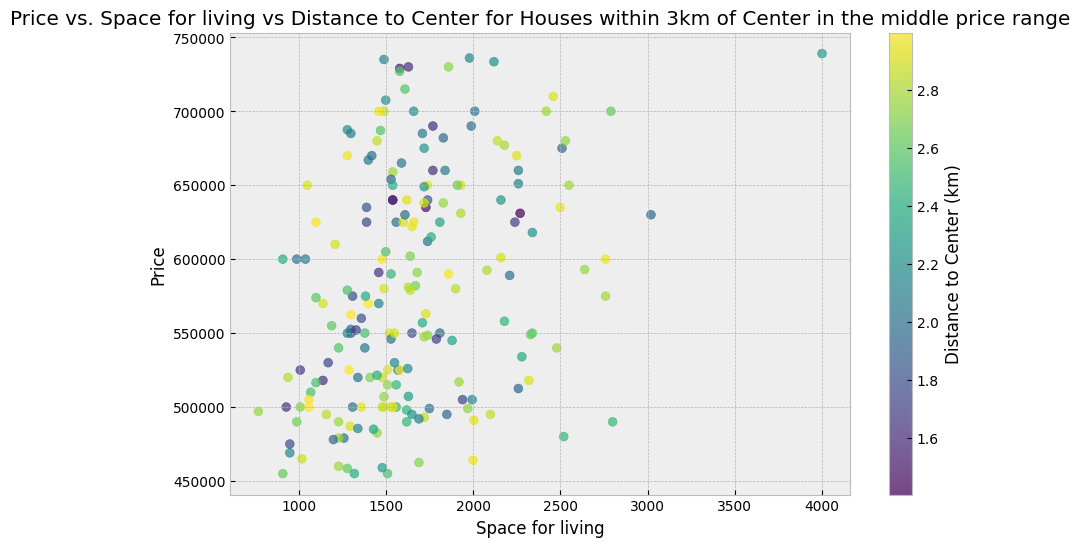

In [606]:
colors = df_center_mp['distance_to_center']
plt.figure(figsize=(10, 6))
plt.scatter(df_center_mp['sqft_living'], df_center_mp['price'], c=colors, s=40, alpha=0.7)
plt.xlabel('Space for living')
plt.ylabel('Price')
plt.title('Price vs. Space for living vs Distance to Center for Houses within 3km of Center in the middle price range')
plt.colorbar(label='Distance to Center (km)') 
type(colors)

# Timing to buy

In [561]:
# to answer to the question of what month is the best to buy
# I will proceed to group by month to see if the average prices of these houses
# located at the center depends of the month they have been published.


# Create a new column for the month
df_center_mp['month'] = df_center_mp['date'].dt.month
df_center_mp['month_name'] = df_center_mp['date'].dt.strftime('%B')
df_center_mp_month = df_center_mp.groupby(by=['month','month_name']).mean('price').reset_index()


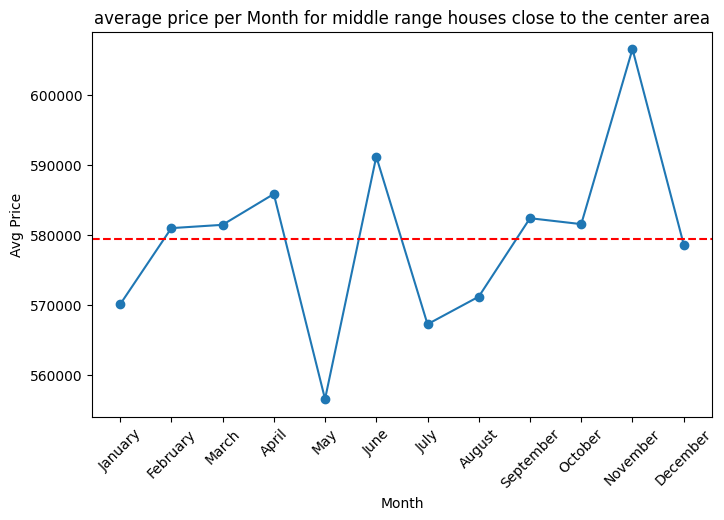

In [562]:

avg_price_yr = df_center_mp_month['price'].mean()

plt.plot(df_center_mp_month['month_name'], df_center_mp_month['price'], marker='o')


plt.xlabel('Month')
plt.ylabel('Avg Price')

plt.title('average price per Month for middle range houses close to the center area')
plt.xticks(rotation=45)
plt.axhline(y=avg_price_yr, color='r', linestyle='--', label=f'Avg Price = {avg_price_yr:.2f}')

plt.show()

In [570]:
# based o the chart above, it seems like the avg target price for houses 
# of the middle range class that has been published in this area tend to be lower in May or July.

#I am aware that this suggestion might be not that 100% accurate due 
# to the fact that the houses compared in this sample are not having 
# the same living space and the same features, but since my client is
#  not specifying other features I assume that the location (within a range of 3 km) is enough to define a commonality. 



In [569]:
final_recommendation = df_center_mp.sort_values(by=['distance_to_center', 'price']).head(3)


In [610]:
final_recommendation['size'] = 10
fig = px.scatter_mapbox(
    final_recommendation, 
    lat='lat', 
    lon='long', 
    zoom=10,
    size='size', 
    title='3 properties full of liveness',
    mapbox_style="open-street-map",
)

fig.update_layout(width=600, height=400)

fig.show()

final_recommendation

,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15,sqft_lot15,date,price,sales_id,distance_to_center,id_house_text,month,month_name,size
1100,2197600451,5,2.000,2270,2400,2.000,0,0,3,7,...,1320,2400,2014-11-05,631000.000,1101,1.404,2197600451,11,November,10
6234,6848200221,3,3.500,1730,1349,3.000,0,0,3,9,...,1830,3300,2014-09-02,635000.000,6235,1.481,6848200221,9,September,10
20185,6003500743,2,2.250,1540,958,3.000,0,0,3,9,...,1410,958,2014-05-19,640000.000,20186,1.545,6003500743,5,May,10
